## Exploratory Analysis
There are thirteen features and one target as below:
* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest 
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    
* target: Heart disease (0 = no, 1 = yes)

In [5]:
# Code Imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbours


from sklearn import preprocessing
# required for task 1.2
from sklearn.cluster import KMeans
# for task 2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# for task 3
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [6]:
data_hdy = pd.read_csv("heart.csv")
data_hdy.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data_hdy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
df_target = data_hdy.groupby("target").size()
df_target

target
0    138
1    165
dtype: int64

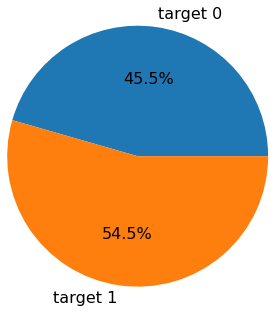

In [34]:
plt.pie(df_target.values, labels = ["target 0", "target 1"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

In [35]:
df_sex = data_hdy.groupby(["sex","target"]).size()
df_sex

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

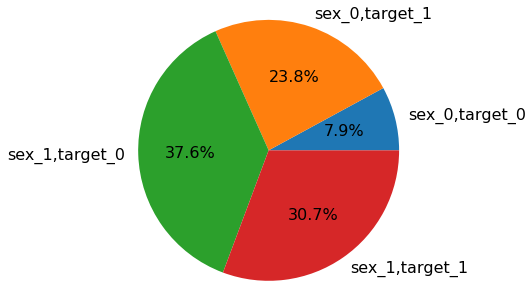

In [36]:
plt.pie(df_sex.values, labels = ["sex_0,target_0", "sex_0,target_1", "sex_1,target_0", "sex_1,target_1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

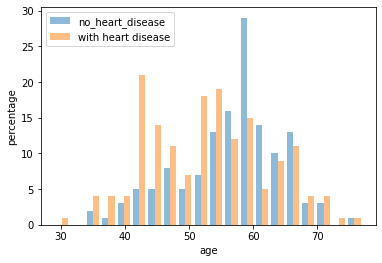

In [38]:
plt.hist([data_hdy[data_hdy.target==0].age, data_hdy[data_hdy.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

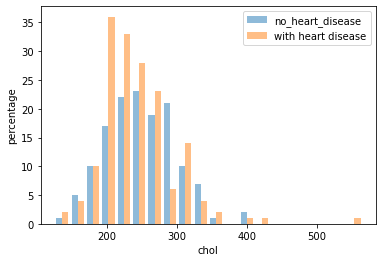

In [40]:
plt.hist([data_hdy[data_hdy.target==0].chol, data_hdy[data_hdy.target==1].chol], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()

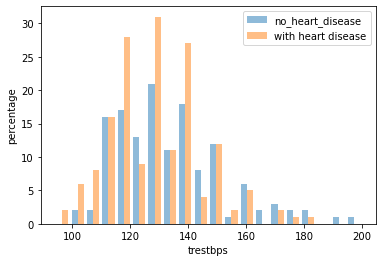

In [46]:
plt.hist([data_hdy[data_hdy.target==0].trestbps, data_hdy[data_hdy.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

In [8]:
data_corr = data_hdy.corr()["target"].sort_values()
print(data_corr.iloc[::-1])

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


In [43]:
features_name = ['cp', 'thalach', 'slope', 'restecg', 'trestbps', 'age', 'sex', 'thal', 'ca', 'oldpeak', 'exang']
features = data_hdy[features_name]
target = data_hdy['target']
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 20)
# random state is useful for getting consistent results

# Decision-Tree Classifier

In [44]:
tcm = tree.DecisionTreeClassifier(random_state = 20, max_depth = 3) # default criterion is gini
tcm = tcm.fit(x_train,y_train)
y_pred = tcm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.85      0.89      0.87        38

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.84      0.83        61



# KNN Classifier

In [19]:
accuracy=[]
for i in range(1,30):
    knc_ = KNeighborsClassifier(n_neighbors=i)
    knc_ = knc_.fit(x_train,y_train)
    y_pred = knc_.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
print(accuracy.index(max(accuracy))+1)

21


In [21]:
knc_ = KNeighborsClassifier(n_neighbors=21)
knc_ = knc_.fit(x_train,y_train)
y_pred = knc_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        23
           1       0.79      0.79      0.79        38

    accuracy                           0.74        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.74      0.74      0.74        61



# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(random_state = 20, max_depth = 3) # default criterion is gini
rfc = rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.86      0.79      0.82        38

    accuracy                           0.79        61
   macro avg       0.77      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



# Adaboost Classifier

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
abc = AdaBoostClassifier(random_state = 0, n_estimators=100) 
abc = abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        23
           1       0.81      0.79      0.80        38

    accuracy                           0.75        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.76      0.75      0.76        61

